In [1]:
import sys
import os
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
sys.path.append(os.path.dirname(os.path.dirname(os.path.dirname(os.path.abspath('"Top 10 Funds by AUM Positioning - Data Gen.ipynb"')))))
sys.path.append(os.path.dirname(os.path.dirname(os.path.dirname(os.path.abspath('"Top 10 Funds by AUM Positioning - Data Gen.ipynb"')))))

In [2]:
dfa = pd.read_pickle('../../data/Index Constituents/universe_with_char_and_sector.pkl')

In [3]:
dfa = dfa.reset_index()
dfa['date'] = pd.to_datetime(dfa['date'])
dfa= dfa.set_index(['ticker','date'])
df = dfa.copy()
target_indices = ['R.3000','R.1000','SP50']
test = dfa[target_indices]
for ind in target_indices:
    df=df.join(test[ind].unstack(0).apply(lambda x: x > x.shift()).astype(int).stack().rename(ind),rsuffix = '_c_flag',how='left')
    df=df.join(test[ind].unstack(0).apply(lambda x: x < x.shift()).astype(int).stack().rename(ind),rsuffix = '_d_flag',how='left')
    lag_r = -12
    lag_d=-12
    flag_name = ind+'_c_flag'
    df = df.join(df[flag_name].unstack(0).shift(lag_r).stack().rename(ind),how = 'left',rsuffix='_c_l_flag')
    flag_name = ind+'_d_flag'
    df = df.join(df[flag_name].unstack(0).shift(lag_d).stack().rename(ind),how = 'left',rsuffix='_d_l_flag')

df

,,SP50,R.1000,R.1000G,R.1000V,R.2000,R.2000G,R.2000V,R.3000,R.3000G,R.3000V,...,R.3000_c_l_flag,R.3000_d_l_flag,R.1000_c_flag,R.1000_d_flag,R.1000_c_l_flag,R.1000_d_l_flag,SP50_c_flag,SP50_d_flag,SP50_c_l_flag,SP50_d_l_flag
ticker,date,,,,,,,,,,,,,,,,,,,,,
CORSQ,1999-12-31,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,0.0,0.0,0,0,0.0,0.0,0,0,0.0,0.0
MCS,1999-12-31,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,0.0,0.0,0,0,0.0,0.0,0,0,0.0,0.0
CTAS,1999-12-31,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,0.0,0.0,0,0,0.0,0.0,0,0,0.0,0.0
HAR,1999-12-31,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,0.0,0.0,0,0,0.0,0.0,0,0,0.0,0.0
BANF,1999-12-31,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,0.0,0.0,0,0,0.0,0.0,0,0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
SEAC,2019-12-31,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,0,0,NaN,NaN,0,0,NaN,NaN
CBUS,2019-12-31,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,...,NaN,NaN,0,0,NaN,NaN,0,0,NaN,NaN
APRN,2019-12-31,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,0,0,NaN,NaN,0,0,NaN,NaN


In [4]:
dfa.columns

Index(['SP50', 'R.1000', 'R.1000G', 'R.1000V', 'R.2000', 'R.2000G', 'R.2000V',
       'R.3000', 'R.3000G', 'R.3000V', 'CRSPTM', 'market_val', 'tret_1mf',
       'tret_3mf', 'tret_12mf', 'tret_36mf', 'sector', 'fcf_yld', 'div_yld',
       'ocf_yld', 'int_burden', 'cfroic', 'res_mom_252d'],
      dtype='object')

In [5]:
df[['market_val','fcf_yld','ocf_yld','div_yld','int_burden','cfroic','res_mom_252d','sector','R.3000_c_l_flag','R.3000_d_l_flag']]

,,market_val,fcf_yld,ocf_yld,div_yld,int_burden,cfroic,res_mom_252d,sector,R.3000_c_l_flag,R.3000_d_l_flag
ticker,date,,,,,,,,,,
CORSQ,1999-12-31,329.337006,9.144028,10.288486,2.395833,0.991746,9.902617,-26.942434,3010,0.0,0.0
MCS,1999-12-31,389.564643,-13.648150,15.476572,1.637209,0.664243,10.657537,-12.963236,1510,0.0,0.0
CTAS,1999-12-31,5804.504717,0.626259,3.632066,0.414118,0.923622,21.353880,-35.409958,1010,0.0,0.0
HAR,1999-12-31,983.933950,11.586454,17.334110,0.356347,0.292474,20.464317,44.526463,5515,0.0,0.0
BANF,1999-12-31,272.540262,8.853490,13.144922,1.709024,0.914576,17.106012,-0.888973,3010,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
SEAC,2019-12-31,142.213972,-7.547002,-7.354466,0.000000,1.000000,-19.950527,116.358460,1515,NaN,NaN
CBUS,2019-12-31,258.665353,-16.677113,-14.978098,0.000000,1.042677,-29.900986,-64.718796,4510,NaN,NaN
APRN,2019-12-31,465.414317,-40.548938,-33.604449,0.000000,1.163465,-11.028030,-67.504250,5010,NaN,NaN


R.3000


C:\Users\nurciuoli\AppData\Local\Temp\7\ipykernel_30752\4020803189.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp['market_val'] = df_temp['market_val'].unstack().rank(method='min',ascending= False).stack()
C:\Users\nurciuoli\AppData\Local\Temp\7\ipykernel_30752\4020803189.py:47: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_tempf.iloc[:,1:-2] = df_tempf.iloc[:,1:-2].fillna(df_tempf.iloc[:,1:-2].mean())
C:\Users\nurciuoli\AppData\Local\Temp\7\ipykernel_30752\4020803189.py:48: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slic

R.3000_c_l_flag


c:\Users\nurciuoli\AppData\Local\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\nurciuoli\AppData\Local\Temp\7\ipykernel_30752\4020803189.py:78: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  rf_s = pd.Series(rf.feature_importances_,index = df_r.drop(target, 1).columns).sort_values()


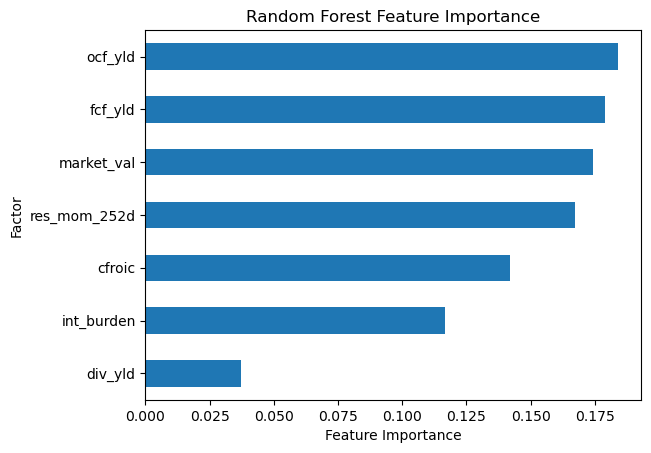

c:\Users\nurciuoli\AppData\Local\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


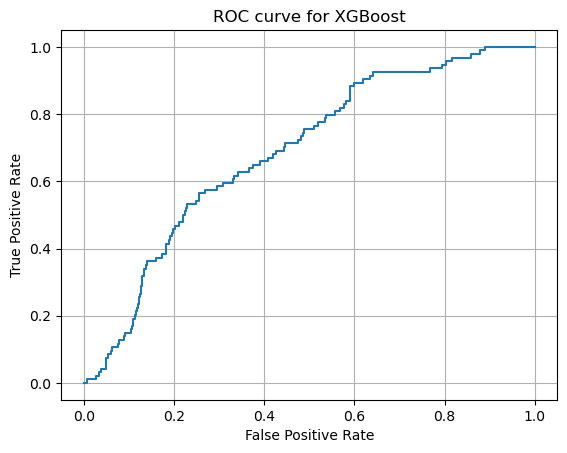

XGBoost AUC Score:  0.6886840160691593


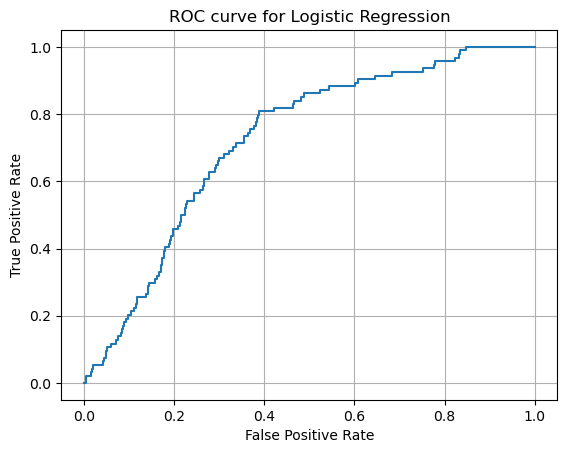

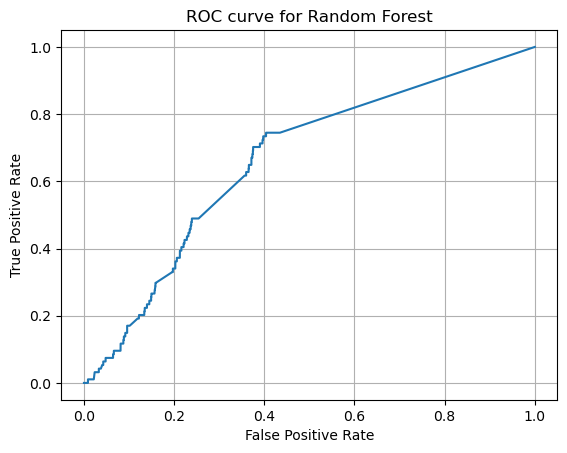

Logistic Regression AUC Score:  0.7222686025803948
Random Forest AUC Score:  0.6606992220451777


C:\Users\nurciuoli\AppData\Local\Temp\7\ipykernel_30752\4020803189.py:156: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X = df_r.drop(target, 1).unstack().ffill().stack().dropna()


R.3000_d_l_flag


C:\Users\nurciuoli\AppData\Local\Temp\7\ipykernel_30752\4020803189.py:60: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df_r.drop(target, 1),
c:\Users\nurciuoli\AppData\Local\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\nurciuoli\AppData\Local\Temp\7\ipykernel_30752\4020803189.py:78: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  rf_s = pd.Series(rf.feature_im

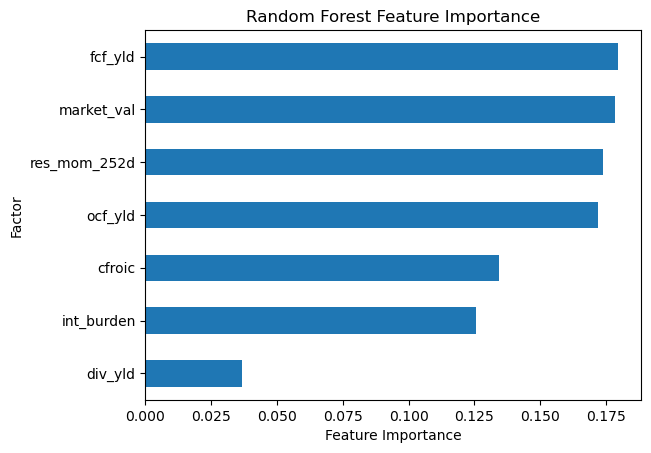

c:\Users\nurciuoli\AppData\Local\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


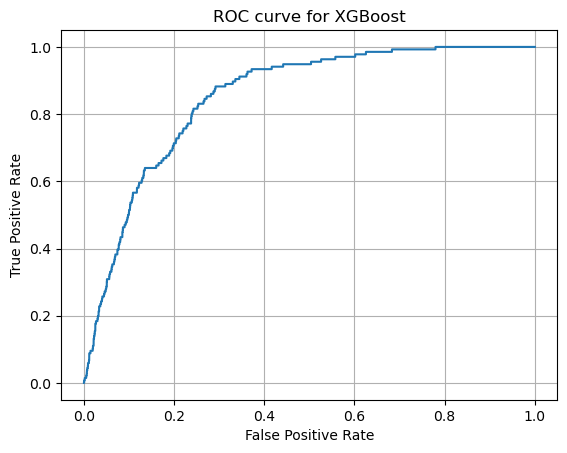

XGBoost AUC Score:  0.8509733370367366


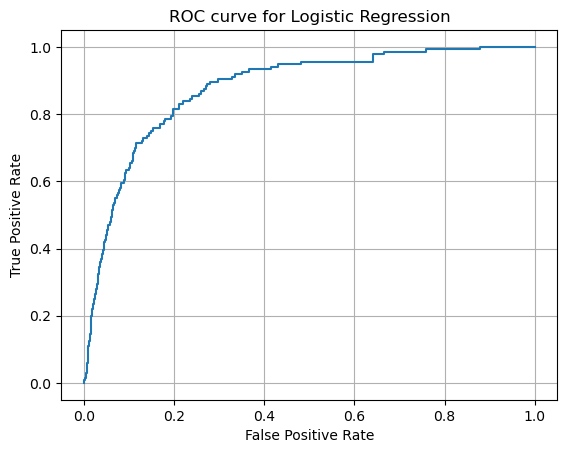

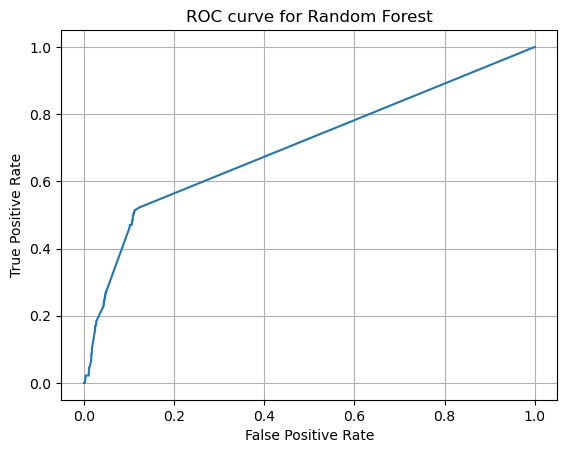

Logistic Regression AUC Score:  0.8775510099303918
Random Forest AUC Score:  0.7043038714255058


C:\Users\nurciuoli\AppData\Local\Temp\7\ipykernel_30752\4020803189.py:156: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X = df_r.drop(target, 1).unstack().ffill().stack().dropna()


R.1000


C:\Users\nurciuoli\AppData\Local\Temp\7\ipykernel_30752\4020803189.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp['market_val'] = df_temp['market_val'].unstack().rank(method='min',ascending= False).stack()


R.1000_c_l_flag


C:\Users\nurciuoli\AppData\Local\Temp\7\ipykernel_30752\4020803189.py:60: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df_r.drop(target, 1),
C:\Users\nurciuoli\AppData\Local\Temp\7\ipykernel_30752\4020803189.py:78: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  rf_s = pd.Series(rf.feature_importances_,index = df_r.drop(target, 1).columns).sort_values()


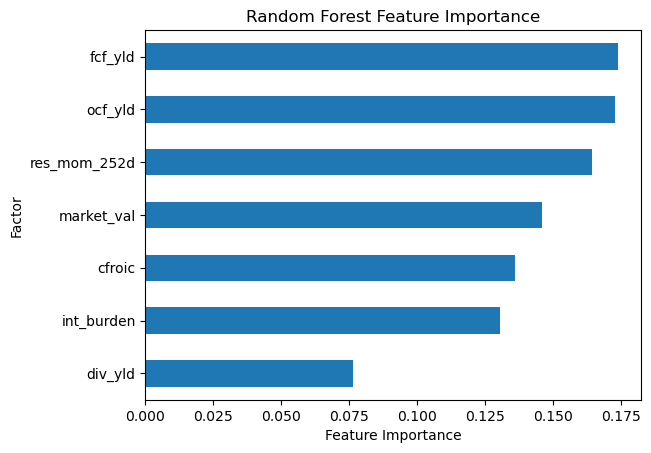

c:\Users\nurciuoli\AppData\Local\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


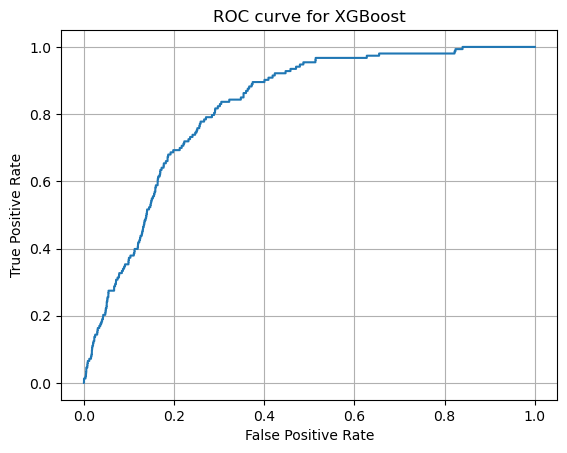

XGBoost AUC Score:  0.8211817232107794


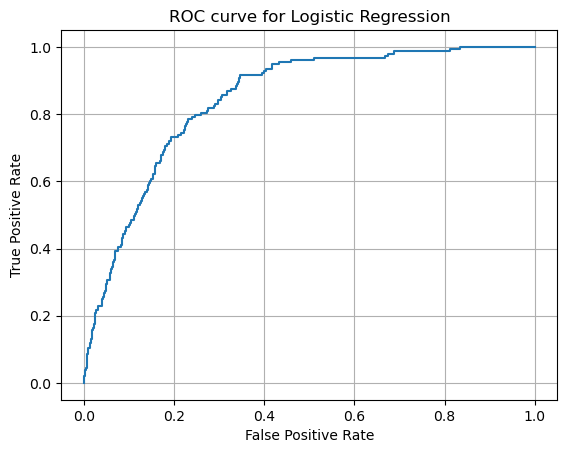

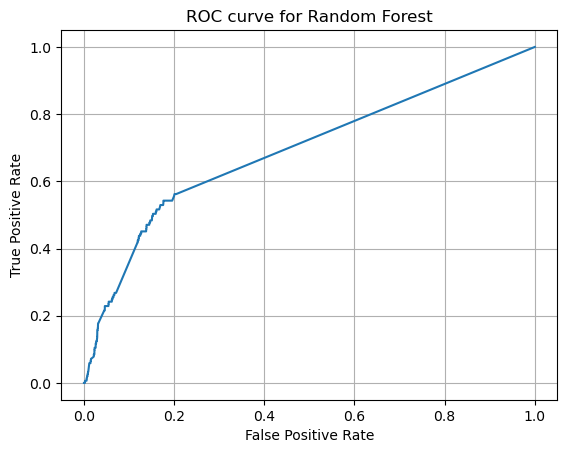

Logistic Regression AUC Score:  0.8446346213637197
Random Forest AUC Score:  0.6919046261519712


C:\Users\nurciuoli\AppData\Local\Temp\7\ipykernel_30752\4020803189.py:156: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X = df_r.drop(target, 1).unstack().ffill().stack().dropna()


R.1000_d_l_flag


C:\Users\nurciuoli\AppData\Local\Temp\7\ipykernel_30752\4020803189.py:60: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df_r.drop(target, 1),
C:\Users\nurciuoli\AppData\Local\Temp\7\ipykernel_30752\4020803189.py:78: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  rf_s = pd.Series(rf.feature_importances_,index = df_r.drop(target, 1).columns).sort_values()


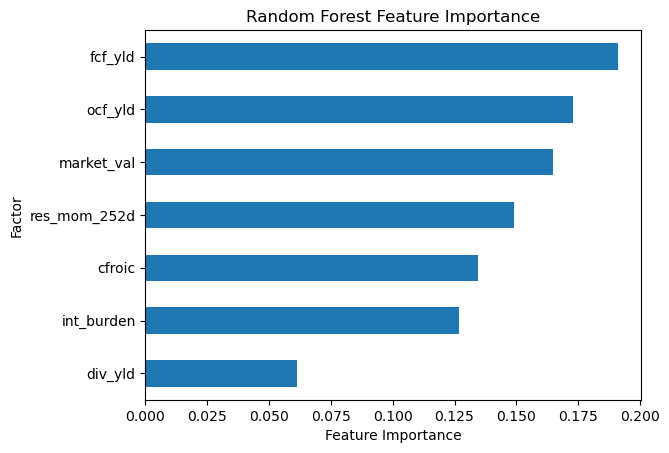

c:\Users\nurciuoli\AppData\Local\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


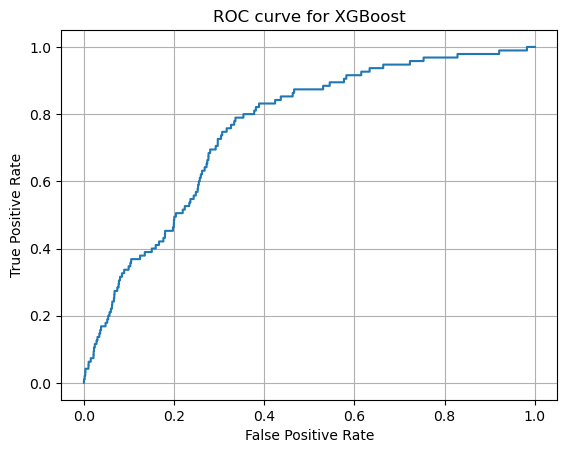

XGBoost AUC Score:  0.7579457008028437


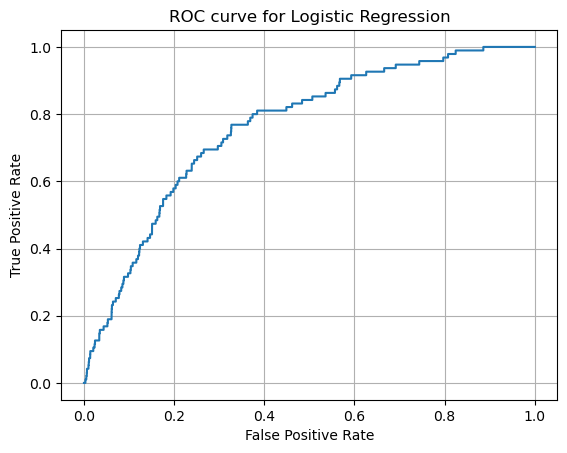

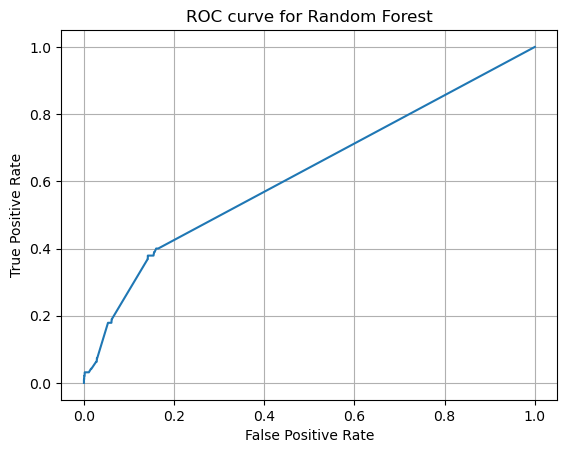

Logistic Regression AUC Score:  0.7629480715946881
Random Forest AUC Score:  0.6217533860391002


C:\Users\nurciuoli\AppData\Local\Temp\7\ipykernel_30752\4020803189.py:156: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X = df_r.drop(target, 1).unstack().ffill().stack().dropna()


SP50


C:\Users\nurciuoli\AppData\Local\Temp\7\ipykernel_30752\4020803189.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp['market_val'] = df_temp['market_val'].unstack().rank(method='min',ascending= False).stack()


SP50_c_l_flag


C:\Users\nurciuoli\AppData\Local\Temp\7\ipykernel_30752\4020803189.py:60: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df_r.drop(target, 1),
c:\Users\nurciuoli\AppData\Local\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\nurciuoli\AppData\Local\Temp\7\ipykernel_30752\4020803189.py:78: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  rf_s = pd.Series(rf.feature_im

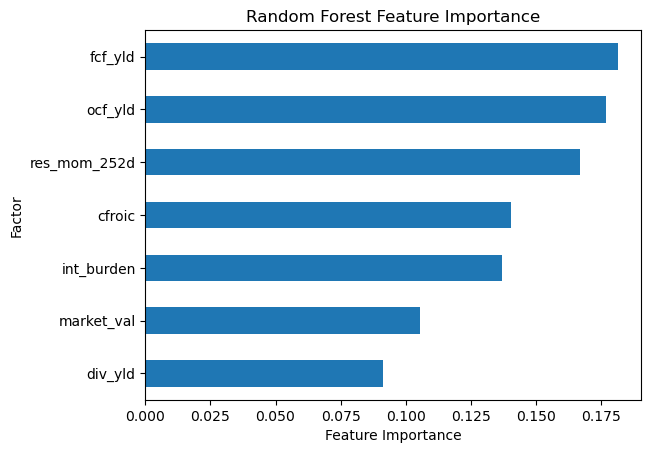

c:\Users\nurciuoli\AppData\Local\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


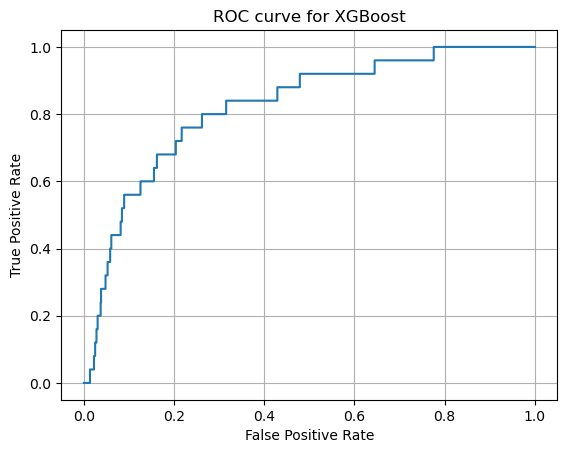

XGBoost AUC Score:  0.8225806600294985


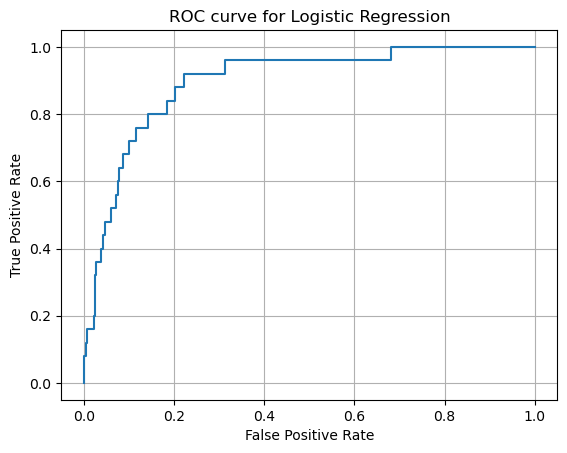

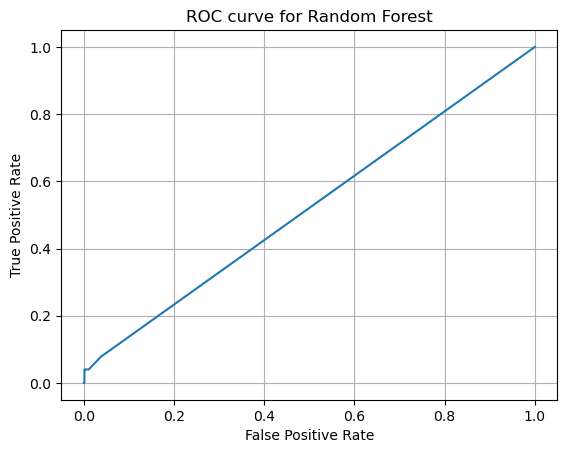

Logistic Regression AUC Score:  0.8963716814159292
Random Forest AUC Score:  0.5206563421828908


C:\Users\nurciuoli\AppData\Local\Temp\7\ipykernel_30752\4020803189.py:156: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X = df_r.drop(target, 1).unstack().ffill().stack().dropna()


SP50_d_l_flag


C:\Users\nurciuoli\AppData\Local\Temp\7\ipykernel_30752\4020803189.py:47: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_tempf.iloc[:,1:-2] = df_tempf.iloc[:,1:-2].fillna(df_tempf.iloc[:,1:-2].mean())
C:\Users\nurciuoli\AppData\Local\Temp\7\ipykernel_30752\4020803189.py:48: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_tempf.iloc[:,1:-2] = df_tempf.iloc[:,1:-2].apply(lambda x: stats.mstats.winsorize(x, limits=[0.05, 0.05]))
C:\Users\nurciuoli\AppData\Local\Temp\7\ipykernel_30752\4020803189.py:49: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the docu

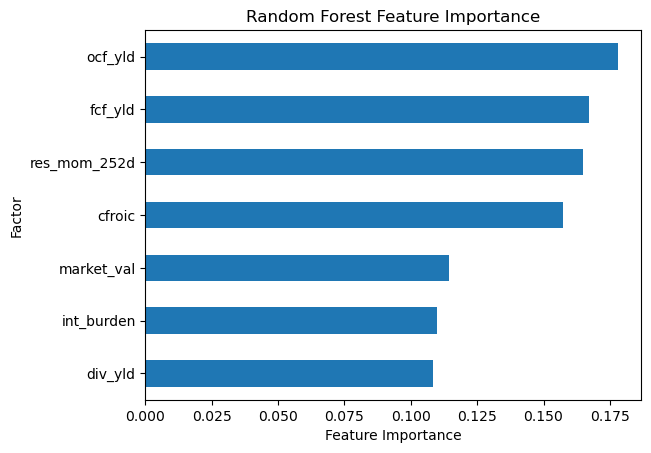

c:\Users\nurciuoli\AppData\Local\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


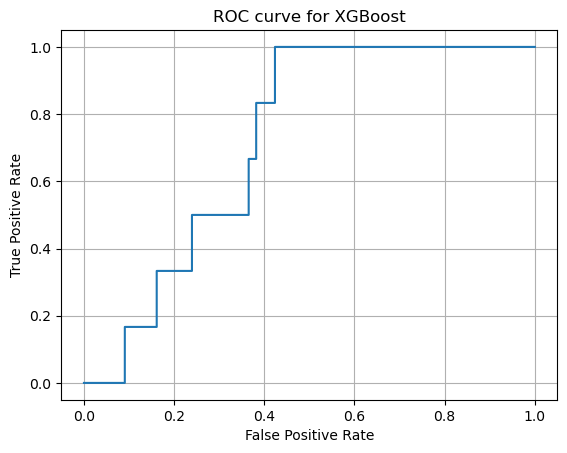

XGBoost AUC Score:  0.722918983483669


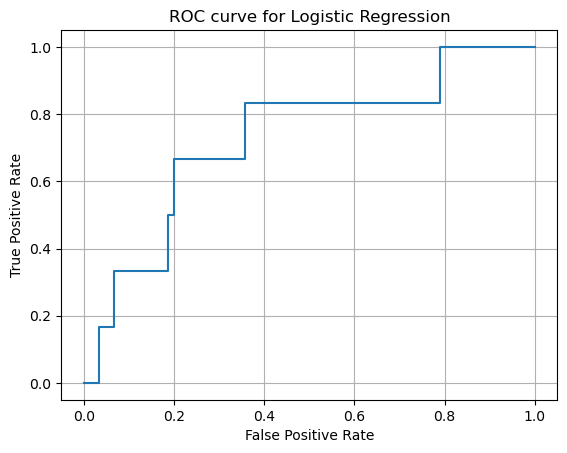

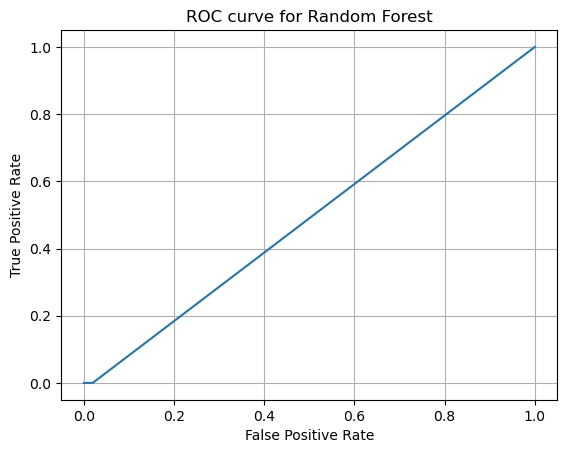

Logistic Regression AUC Score:  0.7277345305270674
Random Forest AUC Score:  0.49030025948350425


C:\Users\nurciuoli\AppData\Local\Temp\7\ipykernel_30752\4020803189.py:156: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X = df_r.drop(target, 1).unstack().ffill().stack().dropna()


,,SP50,R.1000,R.1000G,R.1000V,R.2000,R.2000G,R.2000V,R.3000,R.3000G,R.3000V,...,R.1000_c_l_flag_dt,R.1000_d_l_flag,R.1000_d_l_flag_xgb,R.1000_d_l_flag_dt,SP50_c_l_flag,SP50_c_l_flag_xgb,SP50_c_l_flag_dt,SP50_d_l_flag,SP50_d_l_flag_xgb,SP50_d_l_flag_dt
ticker,date,,,,,,,,,,,,,,,,,,,,,
CORSQ,1999-12-31,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,0.0,NaN,NaN,NaN,0.0,0.0,0.0,NaN,NaN,NaN
MCS,1999-12-31,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CTAS,1999-12-31,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
HAR,1999-12-31,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
BANF,1999-12-31,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,0.0,NaN,NaN,NaN,0.0,0.0,0.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
SEAC,2019-12-31,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CBUS,2019-12-31,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
APRN,2019-12-31,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
from scipy import stats
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
import xgboost as xgb
from sklearn import tree
from sklearn.metrics import accuracy_score
df_final = dfa.copy()
le = LabelEncoder()
for ind in target_indices:
    print("==========================================")
    print(ind)
    print("==========================================")
    ind_flag = ind+'_c_l_flag'
    ind_flag_d = ind+'_d_l_flag'
    df_temp = df[['market_val','fcf_yld','ocf_yld','div_yld','int_burden','cfroic','res_mom_252d',ind_flag,ind_flag_d]]
    df_temp['market_val'] = df_temp['market_val'].unstack().rank(method='min',ascending= False).stack()
    for flag in [ind_flag,ind_flag_d]:
        print("==========================================")
        print(flag)
        print("==========================================")
        if(flag==ind_flag):
            if(ind=='SP50'):
                df_tempf = df_temp[df_temp['market_val']>500]
                df_tempf = df_tempf[df_tempf['market_val']<1500]
            elif(ind=='R.1000'):
                df_tempf = df_temp[df_temp['market_val']>1000]
                df_tempf = df_tempf[df_tempf['market_val']<2500]
            else:
                df_tempf = df_temp[df_temp['market_val']>3000]
        else:
            if(ind=='SP50'):
                df_tempf = df_temp[df_temp['market_val']<550]
            elif(ind=='R.1000'):
                df_tempf = df_temp[df_temp['market_val']<1000]
                df_tempf = df_tempf[df_tempf['market_val']>250]
            else:
                df_tempf = df_temp[df_temp['market_val']<3000]
                df_tempf = df_tempf[df_tempf['market_val']>1500]
        

        df_tempf.iloc[:,1:-2] = df_tempf.iloc[:,1:-2].fillna(df_tempf.iloc[:,1:-2].mean())
        df_tempf.iloc[:,1:-2] = df_tempf.iloc[:,1:-2].apply(lambda x: stats.mstats.winsorize(x, limits=[0.05, 0.05]))
        df_tempf.iloc[:,1:-2] = df_tempf.iloc[:,1:-2].apply(stats.zscore)
        # Specify target variable name
        if(flag==ind_flag):
            target = ind_flag
            df_r = df_tempf.drop(columns = [ind_flag_d])
        else:
            target = ind_flag_d
            df_r = df_tempf.drop(columns = [ind_flag])
        df_r = df_r.dropna()
        # Split the data
        X_train, X_test, y_train, y_test = train_test_split(
            df_r.drop(target, 1), 
            df_r[target], 
            test_size=0.2, 
            random_state=42)

        # Logistic Regression
        logreg = LogisticRegression()
        logreg.fit(X_train, y_train)

        # Making predictions
        y_pred = logreg.predict(X_test)

        # Random Forest Classifier
        rf = RandomForestClassifier(max_depth=25)
        rf.fit(X_train, y_train)
        # Making predictions
        y_pred_rf = rf.predict(X_test)

        rf_s = pd.Series(rf.feature_importances_,index = df_r.drop(target, 1).columns).sort_values()

        rf_s.plot(kind ='barh')

        plt.title('Random Forest Feature Importance')

        plt.xlabel('Feature Importance')

        plt.ylabel('Factor')

        plt.show()



        # Create a Decision Tree classifier and train
        dt = DecisionTreeClassifier()
        dt = dt.fit(X_train, y_train)

        # Making predictions with Decision Tree
        y_pred_dt = dt.predict(X_test)

        # Compute predicted probabilities with the Decision Tree model
        dt_probs = dt.predict_proba(X_test)[:, 1]


        # Create a XGboost classifier and train
        xgb_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')
        xgb_model = xgb_model.fit(X_train, y_train)

        # Making predictions with XGBoost
        y_pred_xgb = xgb_model.predict(X_test)

        # Compute predicted probabilities with the XGBoost model
        xgb_probs = xgb_model.predict_proba(X_test)[:, 1]

        # Compute ROC curve for XGBoost
        fpr, tpr, thresholds = roc_curve(y_test, xgb_probs)
        plt.plot(fpr, tpr)
        plt.title('ROC curve for XGBoost')
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.grid(True)
        plt.show()

        # Compute AUC score for XGBoost
        xgb_auc = roc_auc_score(y_test, xgb_probs)
        print('XGBoost AUC Score: ', xgb_auc)

        
        # Compute predicted probabilities with the logistic regression model
        lr_probs = logreg.predict_proba(X_test)[:, 1]
        # Compute ROC curve
        fpr, tpr, thresholds = roc_curve(y_test, lr_probs)
        plt.plot(fpr, tpr)
        plt.title('ROC curve for Logistic Regression')
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.grid(True)
        plt.show()

        # Compute predicted probabilities with the RandomForest model
        rf_probs = rf.predict_proba(X_test)[:, 1]
        # Compute ROC curve
        fpr, tpr, thresholds = roc_curve(y_test, rf_probs)
        plt.plot(fpr, tpr)
        plt.title('ROC curve for Random Forest')
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.grid(True)
        plt.show()

        # Compute AUC score
        lr_auc = roc_auc_score(y_test, lr_probs)
        rf_auc = roc_auc_score(y_test, rf_probs)
        print('Logistic Regression AUC Score: ', lr_auc)
        print('Random Forest AUC Score: ', rf_auc)

        # Define training and testing split
        X = df_r.drop(target, 1).unstack().ffill().stack().dropna()
        rfp = rf.predict(X)
        df_rfp_r  =pd.DataFrame(pd.Series(rfp,index = X.index)).rename(columns={0:flag})
        df_final = df_final.join(df_rfp_r,how='left')
        # Predicting for entire dataframe
        xgb_prediction = xgb_model.predict(X)
        df_xgb_pred = pd.DataFrame(pd.Series(xgb_prediction,index = X.index)).rename(columns={0:flag})
        df_final = df_final.join(df_xgb_pred, how='left',rsuffix='_xgb')
        # Predicting for entire dataframe
        dt_prediction = dt.predict(X)
        df_dt_pred = pd.DataFrame(pd.Series(dt_prediction, index = X.index)).rename(columns={0: flag})
        df_final = df_final.join(df_dt_pred, how='left',rsuffix='_dt')



df_final

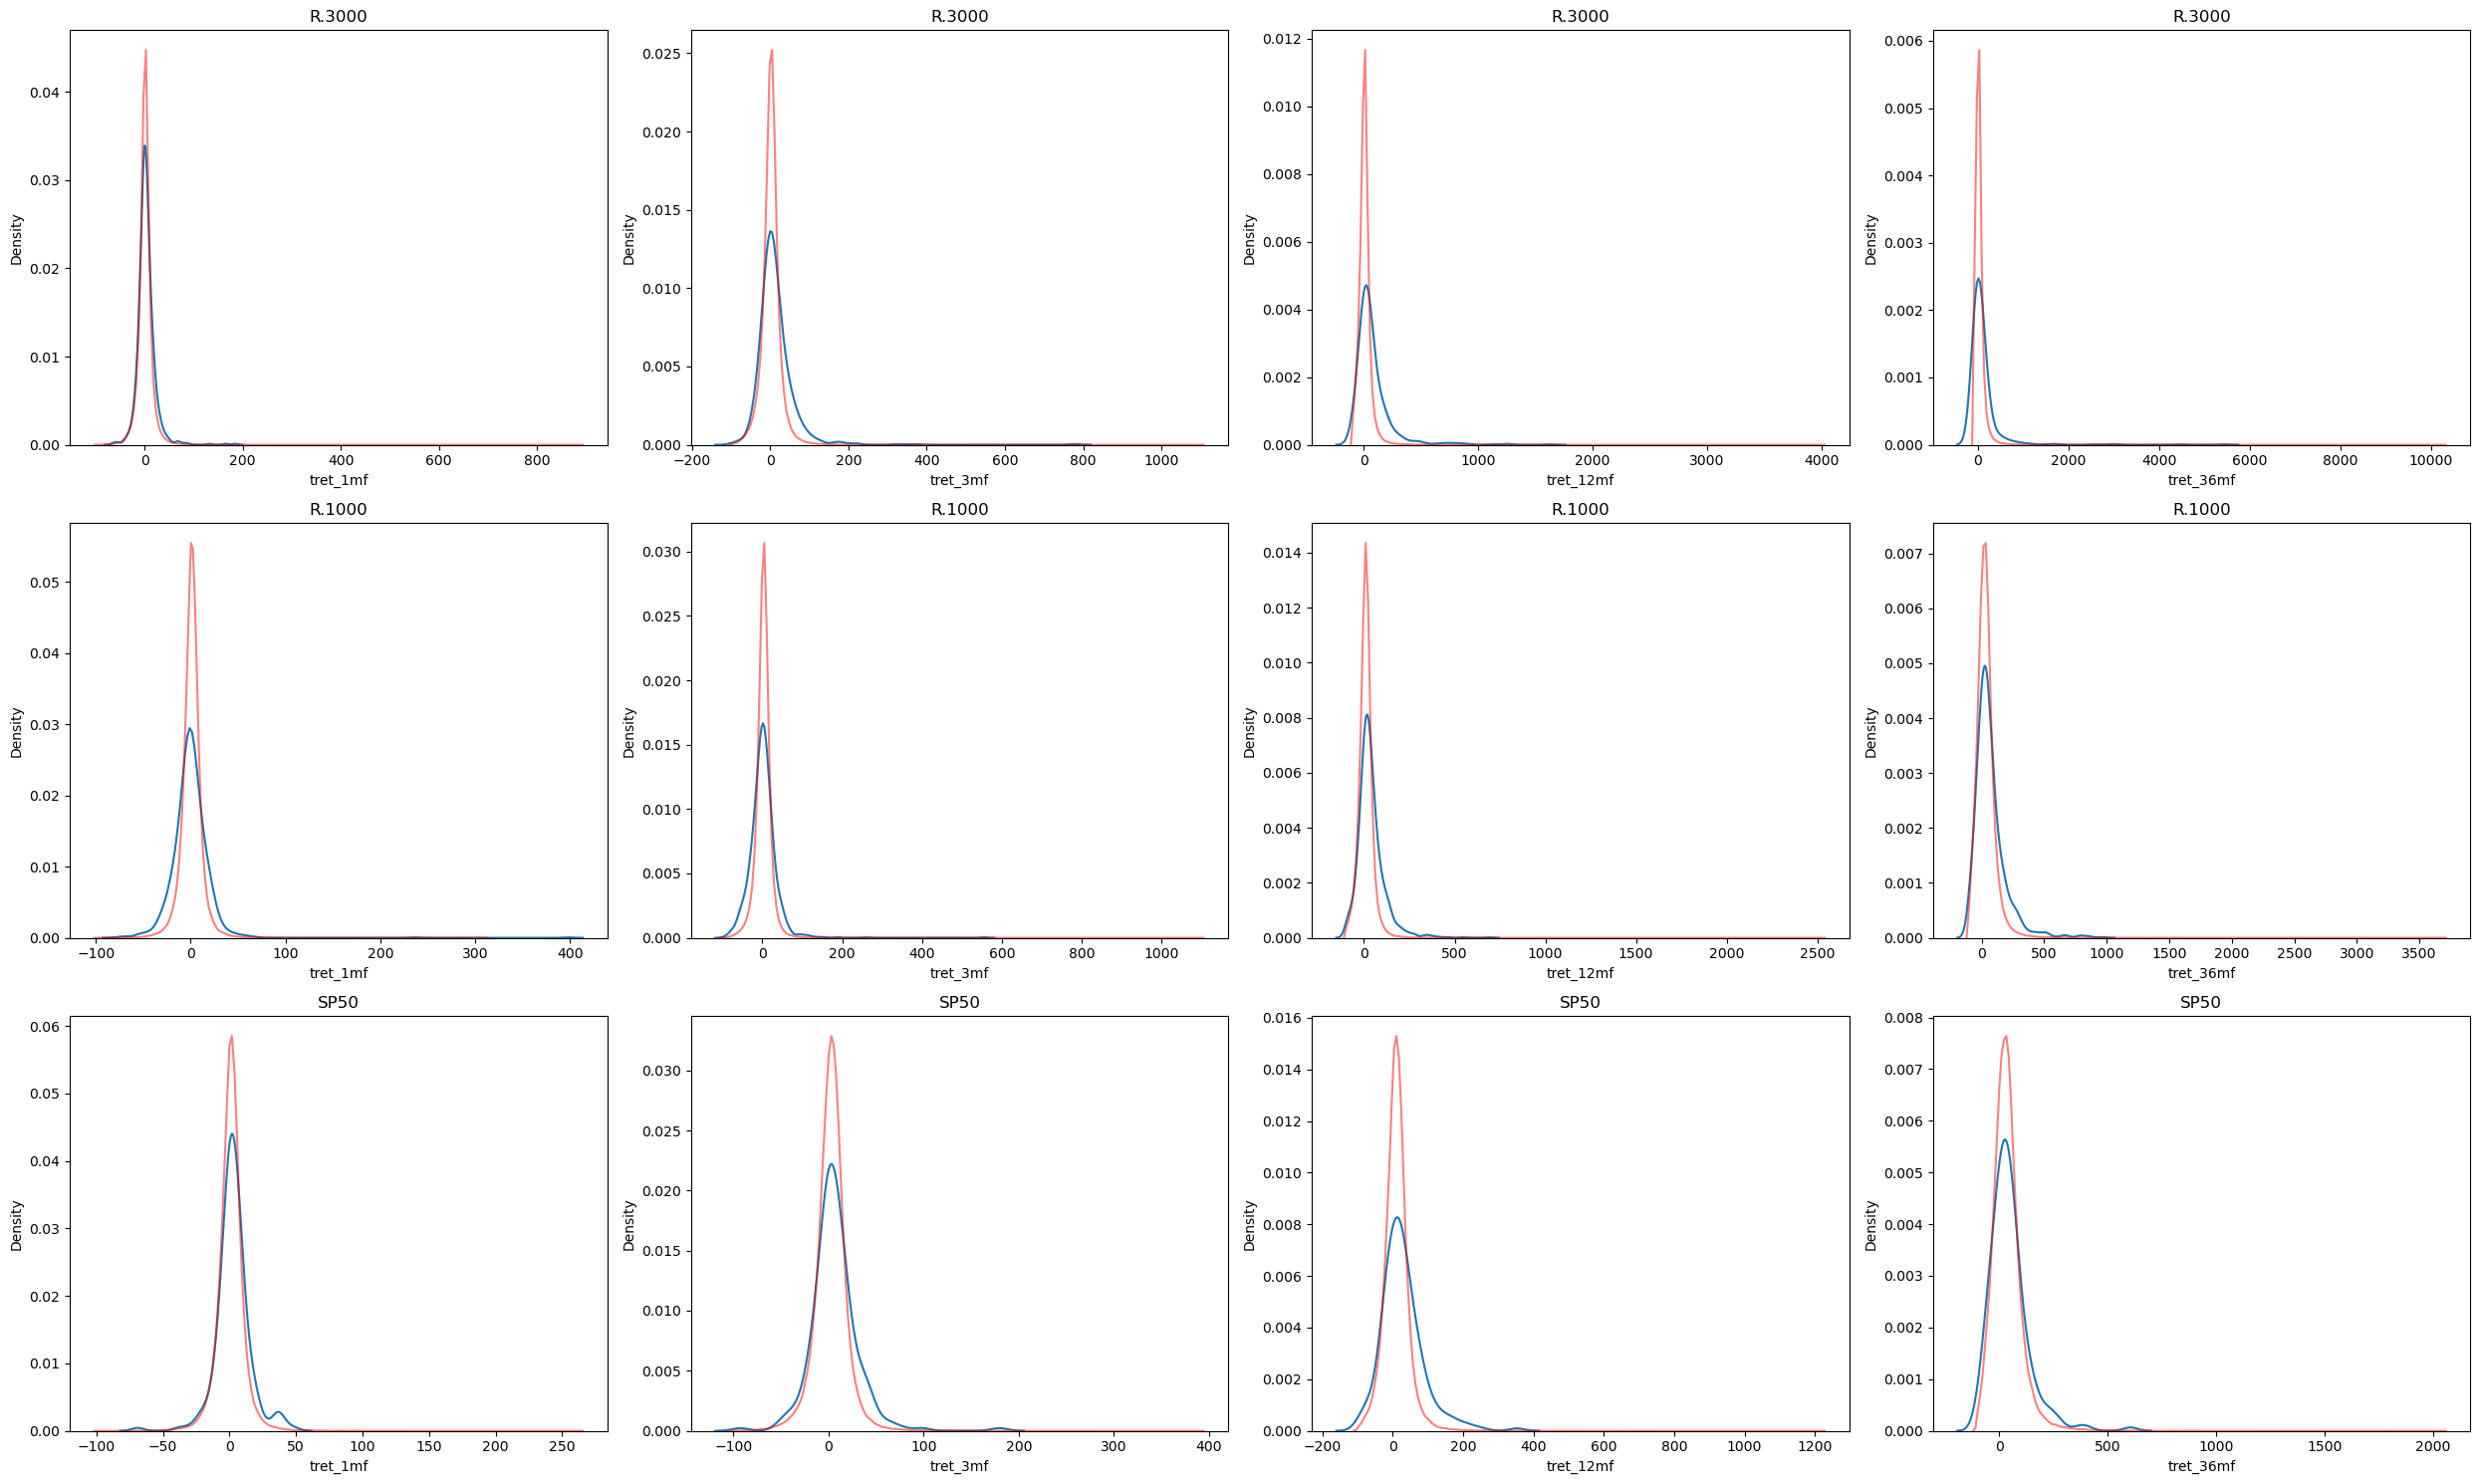

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
fig, axs = plt.subplots(3, 4, figsize=(25, 15))
for x in enumerate(['R.3000','R.1000','SP50']):
    flag =x[1]+'_c_l_flag'
    df_trim = df_final[[flag,'tret_1mf','tret_3mf','tret_12mf','tret_36mf']]
    df_ind= df[df[x[1]]==1]
    for col in enumerate(['tret_1mf', 'tret_3mf', 'tret_12mf', 'tret_36mf']):
        # first histogram plot
        sns.kdeplot(data=df_trim[df_trim[flag]==1], x=col[1],ax=axs[(x[0],col[0])])
        sns.kdeplot(data=df_ind, x=col[1], ax=axs[(x[0],col[0])], alpha=.50,color ='red')
        axs[(x[0],col[0])].set_title(x[1])

    plt.tight_layout()



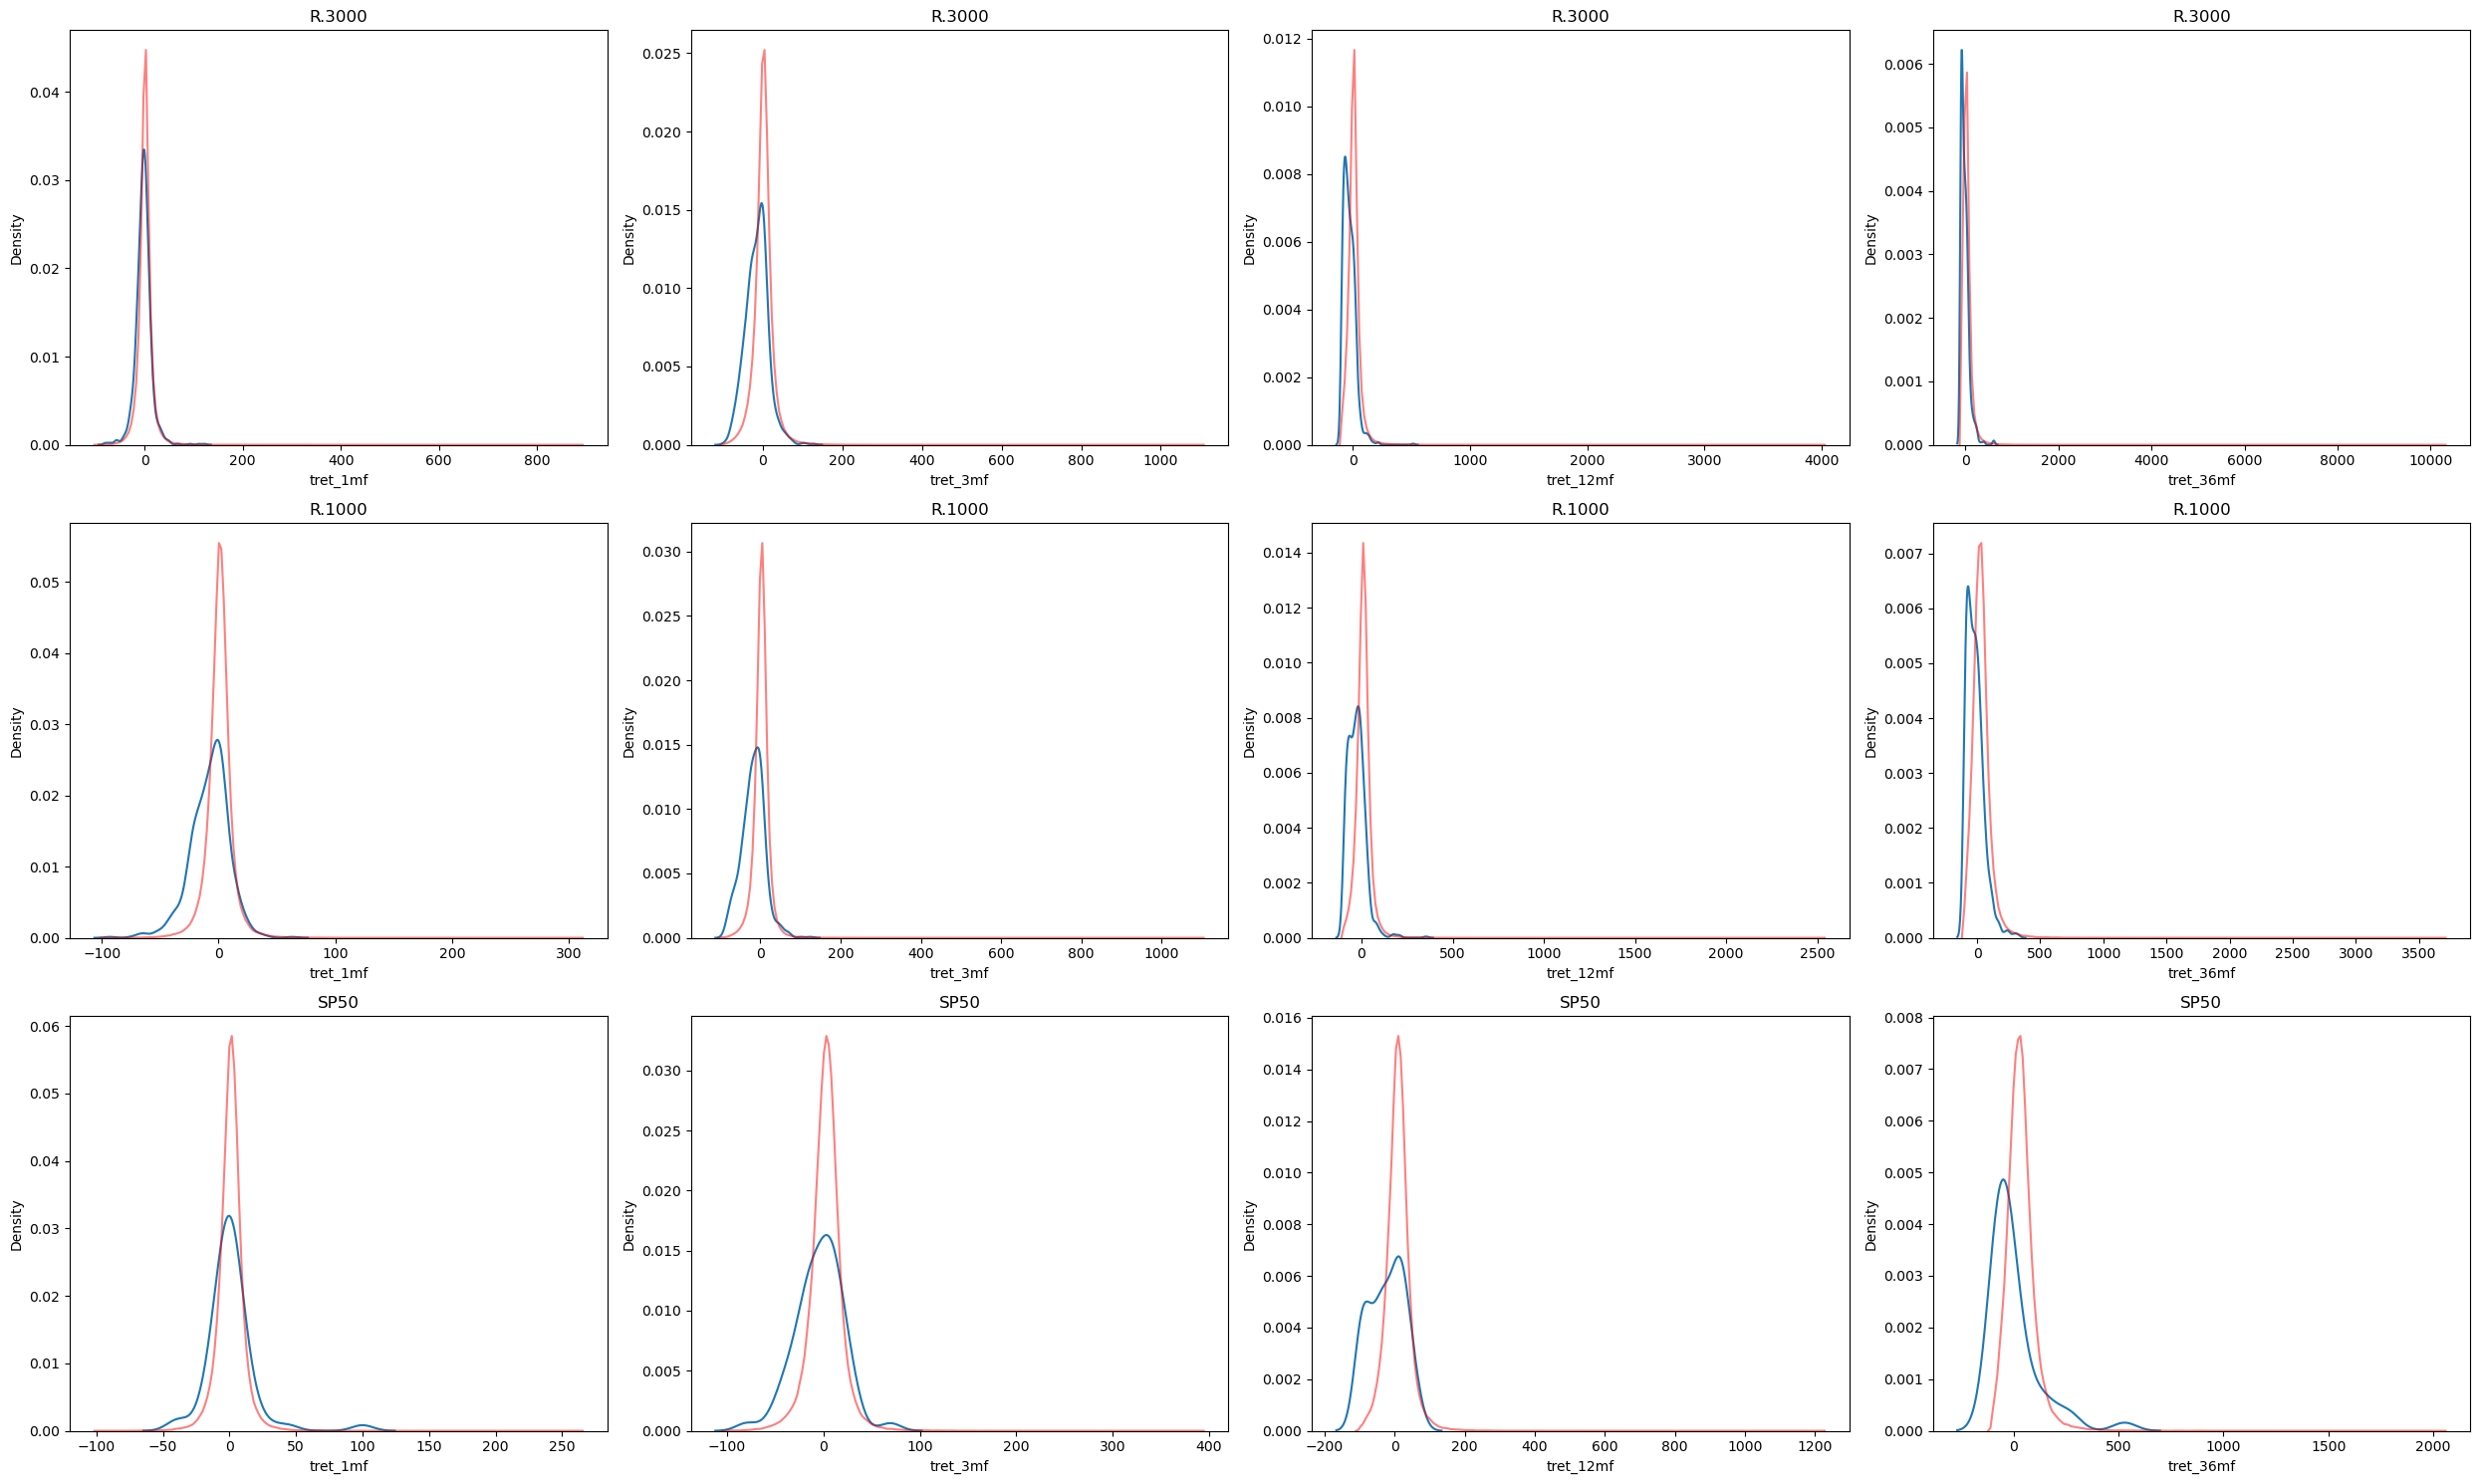

In [11]:
fig, axs = plt.subplots(3, 4, figsize=(25, 15))
for x in enumerate(['R.3000','R.1000','SP50']):
    flag =x[1]+'_d_l_flag'
    df_trim = df_final[[flag,'tret_1mf','tret_3mf','tret_12mf','tret_36mf']]
    df_ind= df[df[x[1]]==1]
    for col in enumerate(['tret_1mf', 'tret_3mf', 'tret_12mf', 'tret_36mf']):
        # first histogram plot
        sns.kdeplot(data=df_trim[df_trim[flag]==1], x=col[1],ax=axs[(x[0],col[0])])
        sns.kdeplot(data=df_ind, x=col[1], ax=axs[(x[0],col[0])], alpha=.50,color ='red')
        axs[(x[0],col[0])].set_title(x[1])

    plt.tight_layout()


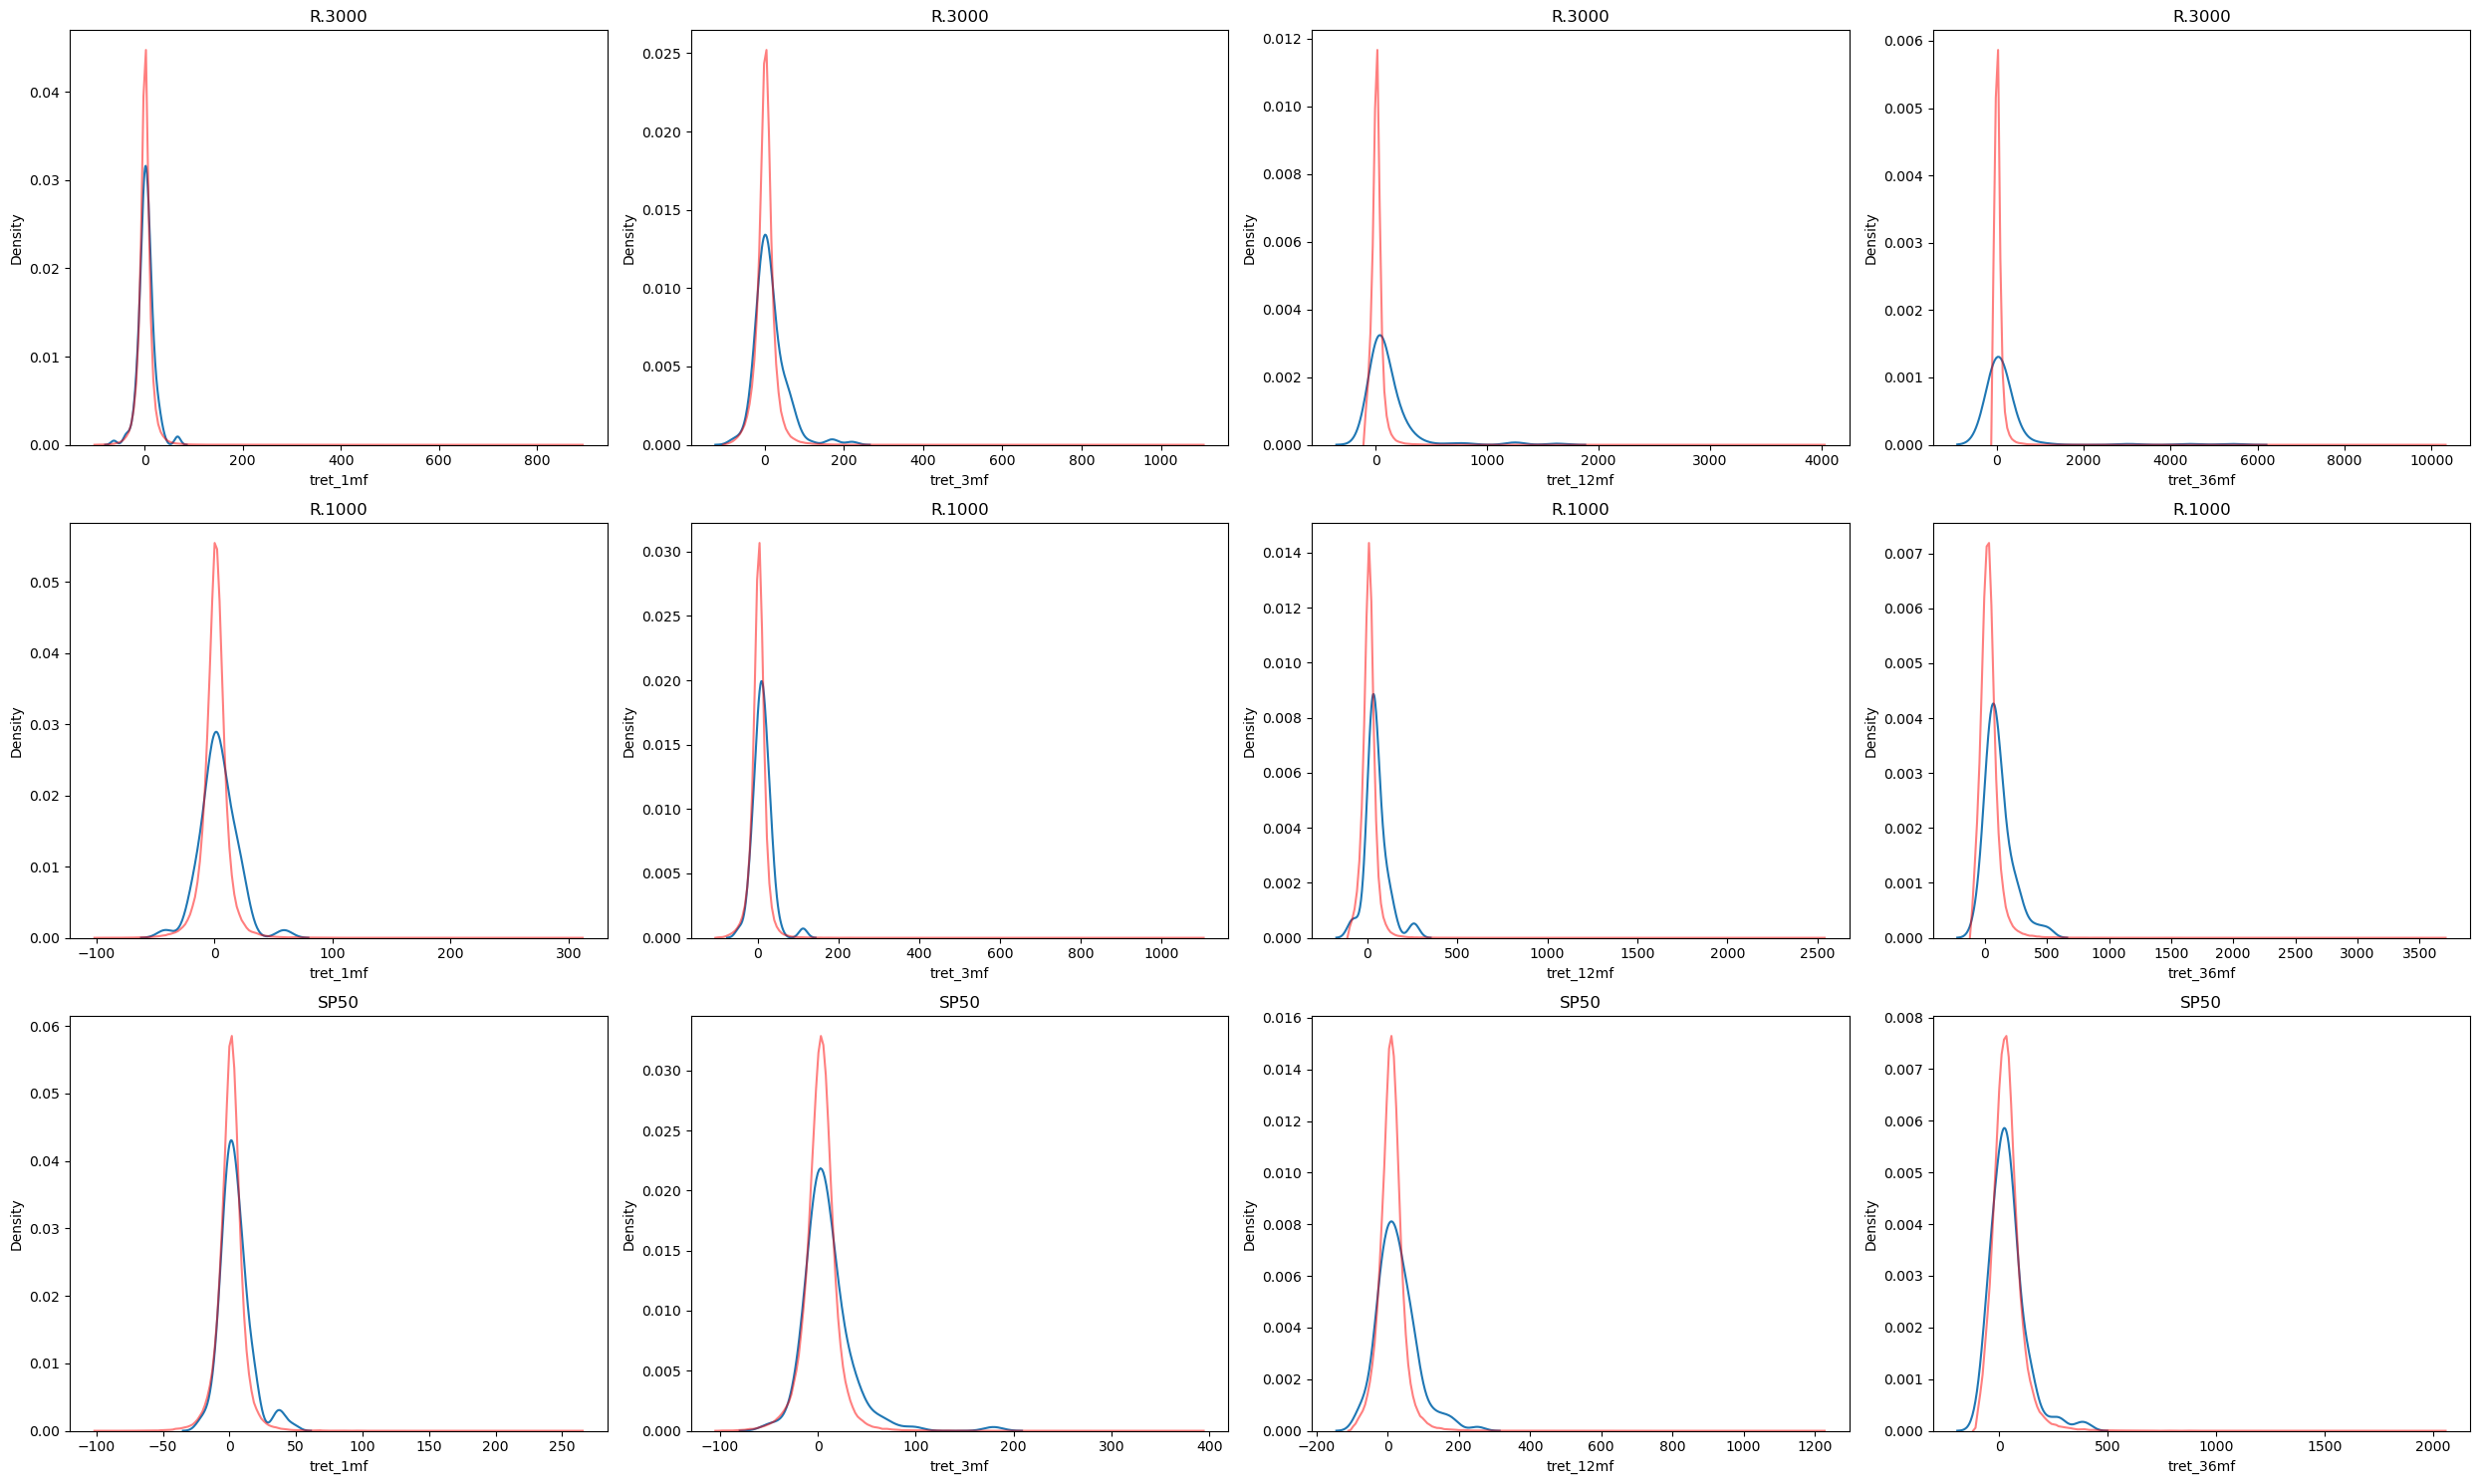

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
fig, axs = plt.subplots(3, 4, figsize=(25, 15))
for x in enumerate(['R.3000','R.1000','SP50']):
    flag =x[1]+'_c_l_flag_xgb'
    df_trim = df_final[[flag,'tret_1mf','tret_3mf','tret_12mf','tret_36mf']]
    df_ind= df[df[x[1]]==1]
    for col in enumerate(['tret_1mf', 'tret_3mf', 'tret_12mf', 'tret_36mf']):
        # first histogram plot
        sns.kdeplot(data=df_trim[df_trim[flag]==1], x=col[1],ax=axs[(x[0],col[0])])
        sns.kdeplot(data=df_ind, x=col[1], ax=axs[(x[0],col[0])], alpha=.50,color ='red')
        axs[(x[0],col[0])].set_title(x[1])

    plt.tight_layout()



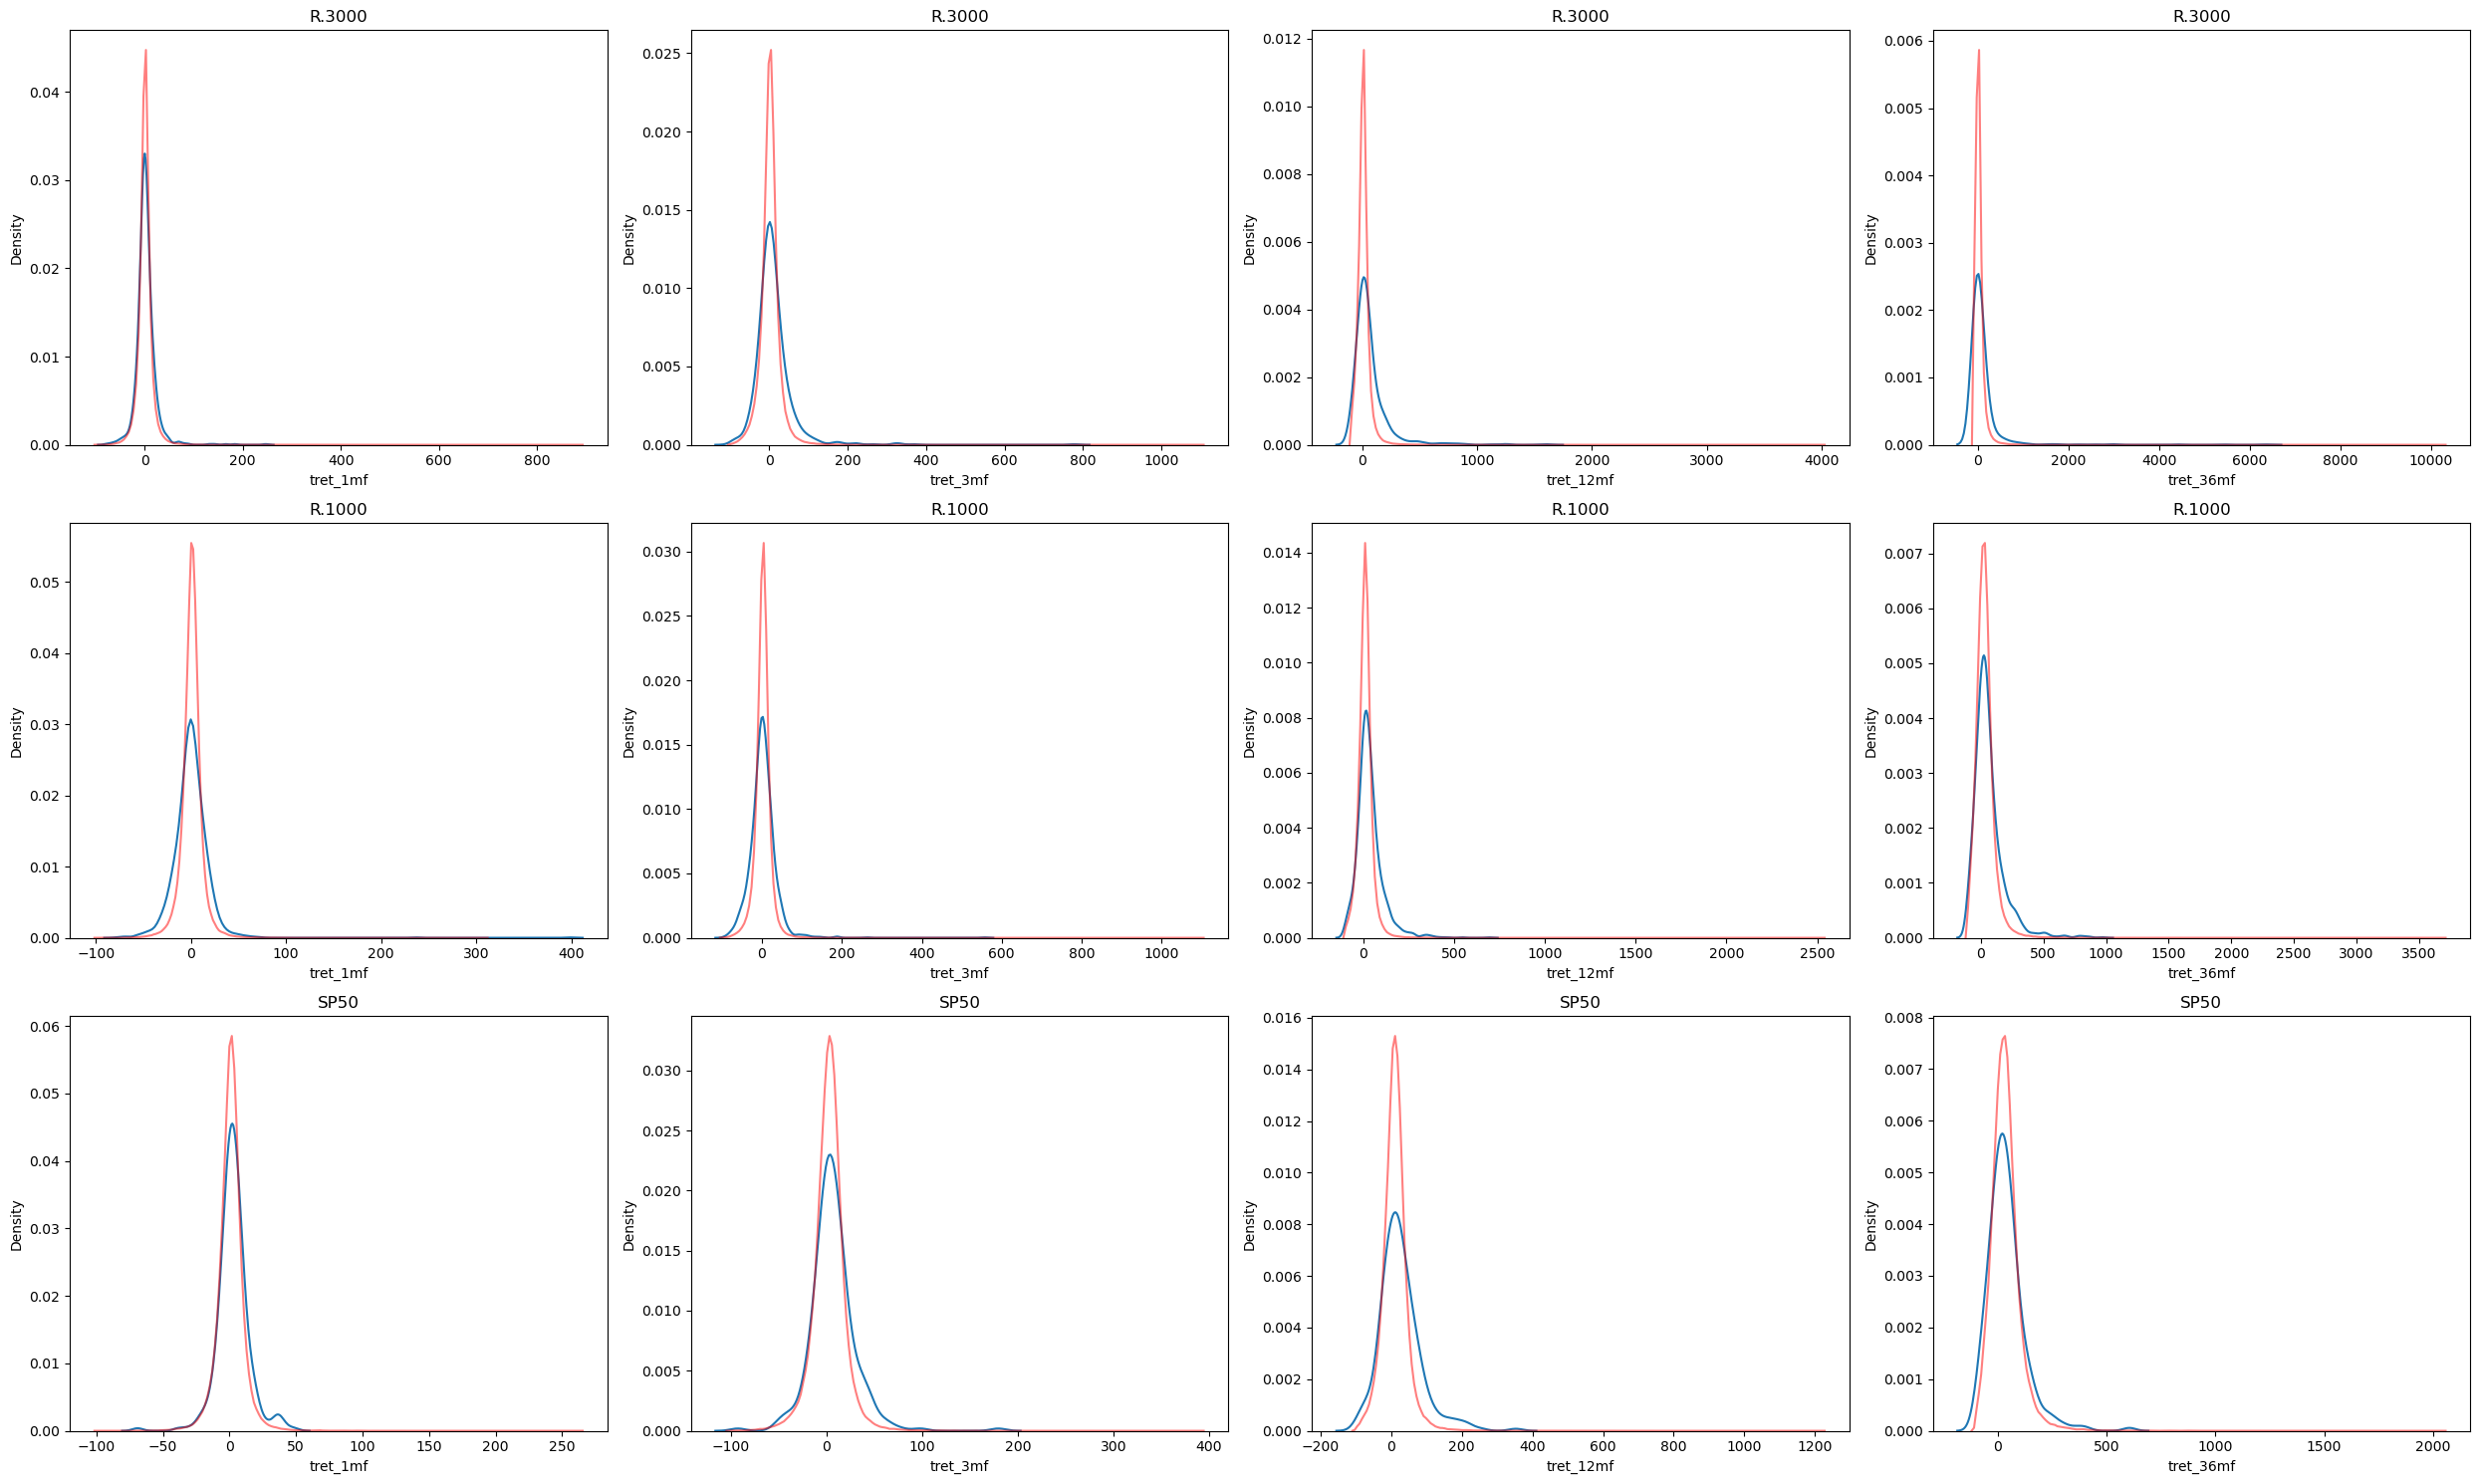

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
fig, axs = plt.subplots(3, 4, figsize=(25, 15))
for x in enumerate(['R.3000','R.1000','SP50']):
    flag =x[1]+'_c_l_flag_dt'
    df_trim = df_final[[flag,'tret_1mf','tret_3mf','tret_12mf','tret_36mf']]
    df_ind= df[df[x[1]]==1]
    for col in enumerate(['tret_1mf', 'tret_3mf', 'tret_12mf', 'tret_36mf']):
        # first histogram plot
        sns.kdeplot(data=df_trim[df_trim[flag]==1], x=col[1],ax=axs[(x[0],col[0])])
        sns.kdeplot(data=df_ind, x=col[1], ax=axs[(x[0],col[0])], alpha=.50,color ='red')
        axs[(x[0],col[0])].set_title(x[1])

    plt.tight_layout()